In [2]:
from wandas.utils.frame_dataset import ChannelFrameDataset

In [3]:
dataset = ChannelFrameDataset.from_folder(
    folder_path="./data/dataset/DCASE2025Task4Dataset/dev_set/sound_event/train",
    recursive=True,
    lazy_loading=True,
)

In [4]:
len(dataset)

2108

0228_102_ch1_001_0


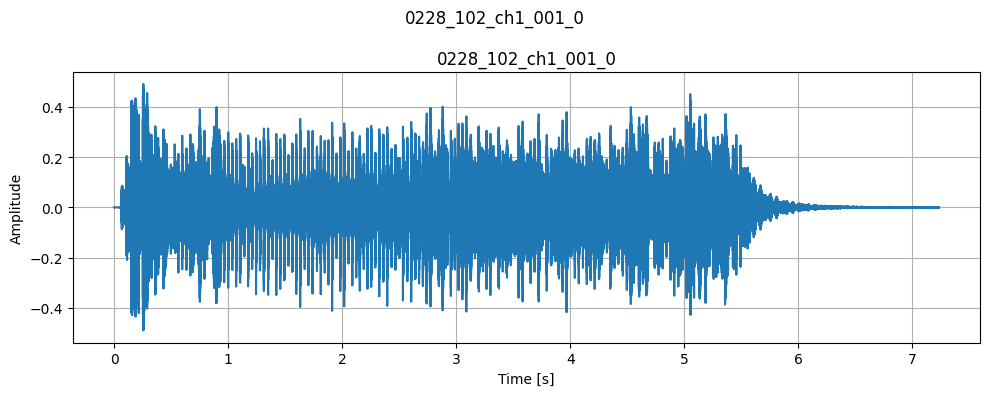

In [5]:
# 最初のファイルの情報を確認
first_frame = dataset[0]
print(first_frame.label)
first_frame.plot()  # 波形を表示


In [6]:
# ランダムに3つのファイルをサンプリング (対応するファイルのみ読み込まれる)
sampled_dataset = dataset.sample(n=3, seed=42)
for i, frame in enumerate(sampled_dataset):
    print(f"Sample {i}: {frame.label}")

Sample 0: 0220_013_ch4_001_4_8
Sample 1: 0220_025_ch2_001_12
Sample 2: 0226_065_ch1_001_1


In [7]:
# 処理を定義 (まだ計算は実行されない)
processed_dataset = dataset.apply(lambda frame: frame.resampling(16000)).apply(
    lambda frame: frame.high_pass_filter(cutoff=500)
)


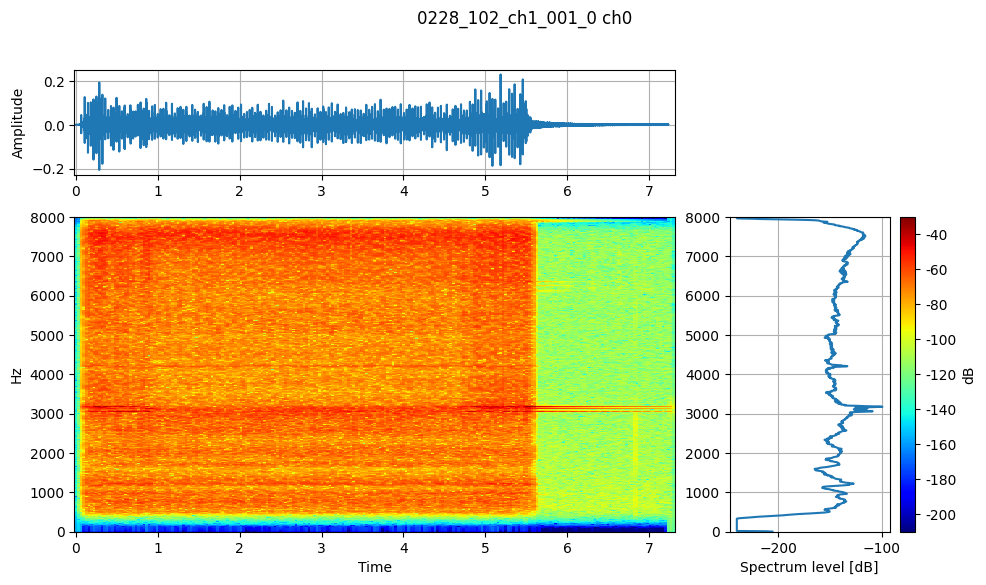

In [8]:
# 最初のフレームに処理を適用した結果を確認 (ここで計算グラフが構築され、最初のフレームに対して計算が実行される)
processed_dataset[0][0].describe()


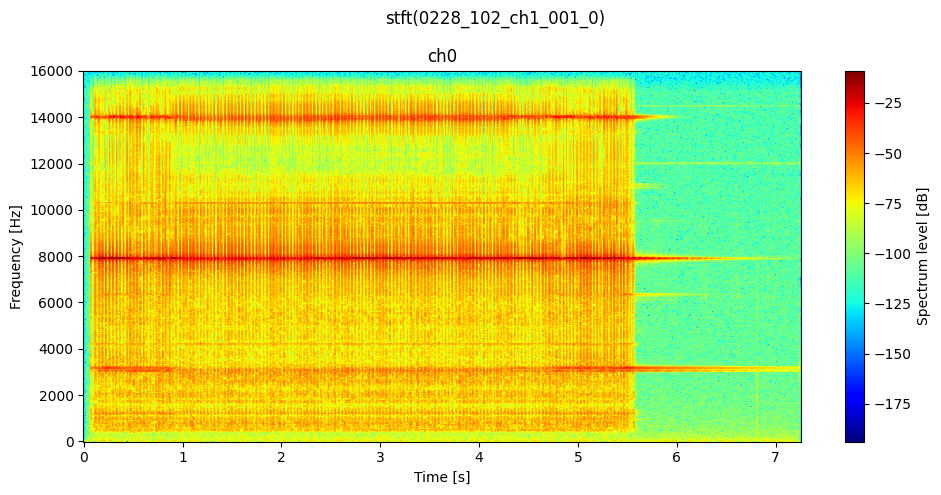

In [9]:
# STFTも試す (これも計算グラフに追加される)
spectrogram_dataset = dataset.stft(n_fft=1024)

# 最初のフレームのスペクトログラムを確認 (ここでSTFTまでの計算が実行される)
spectrogram_frame_0 = spectrogram_dataset[0]
spectrogram_frame_0[0].plot()

In [10]:
trimd_dataset = dataset.trim(start=0, end=10).resample(target_sr=8000)

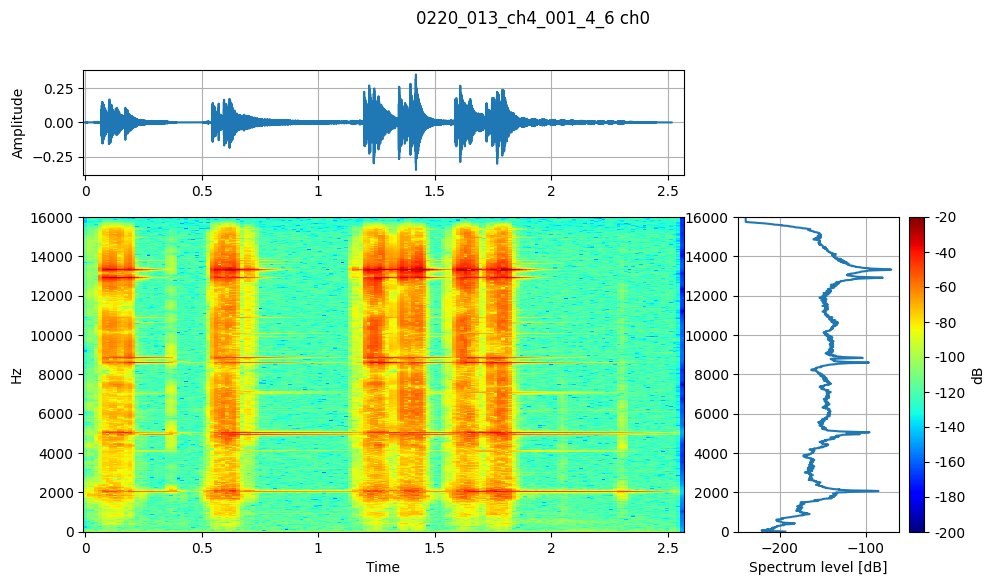

In [11]:
dataset[100][0].describe()

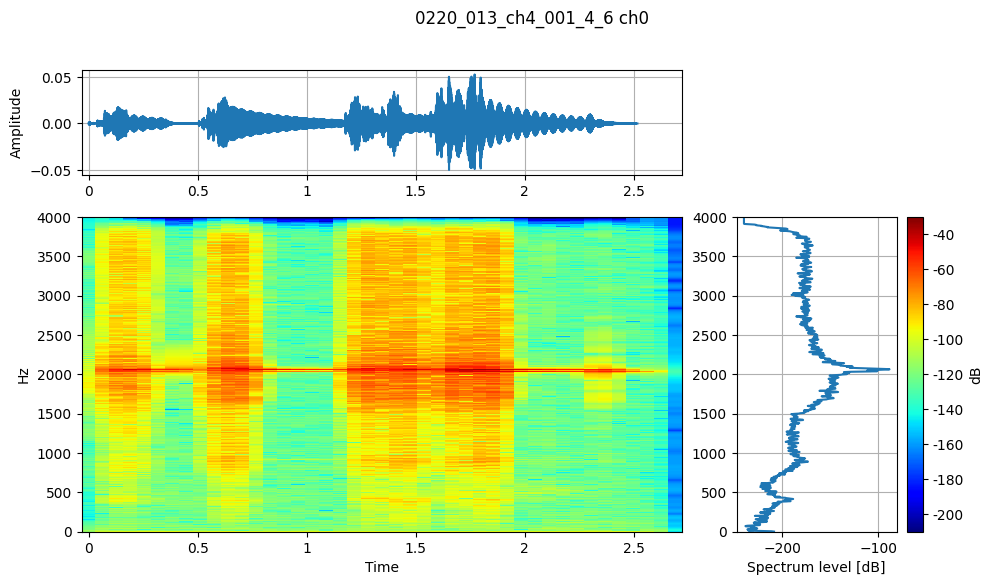

In [12]:
trimd_dataset[100][0].describe()
